# Task
Analyze the heart disease dataset from "/content/heart.csv", perform data visualization and feature analysis, build and tune a deep learning model to predict heart disease, and compare model performance before and after tuning.

## Load the data

### Subtask:
Load the dataset from "/content/heart.csv" into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/backend/datasets/heart/heart.csv')

**Reasoning**:
The data has been loaded successfully, display the first few rows to verify.



In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Explore the data

### Subtask:
Display the first few rows, check for missing values, and examine the data types of each column.


**Reasoning**:
Display the first few rows, check for missing values, and examine the data types of each column in the dataframe.



In [5]:
display(df.head())
display(df.isnull().sum())
display(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

## Visualize the data

### Subtask:
Generate appropriate plots (e.g., histograms, box plots, scatter plots) to understand the distribution of features and their relationship with the target variable (heart disease).


**Reasoning**:
Generate histograms for all numerical features to visualize their distributions.



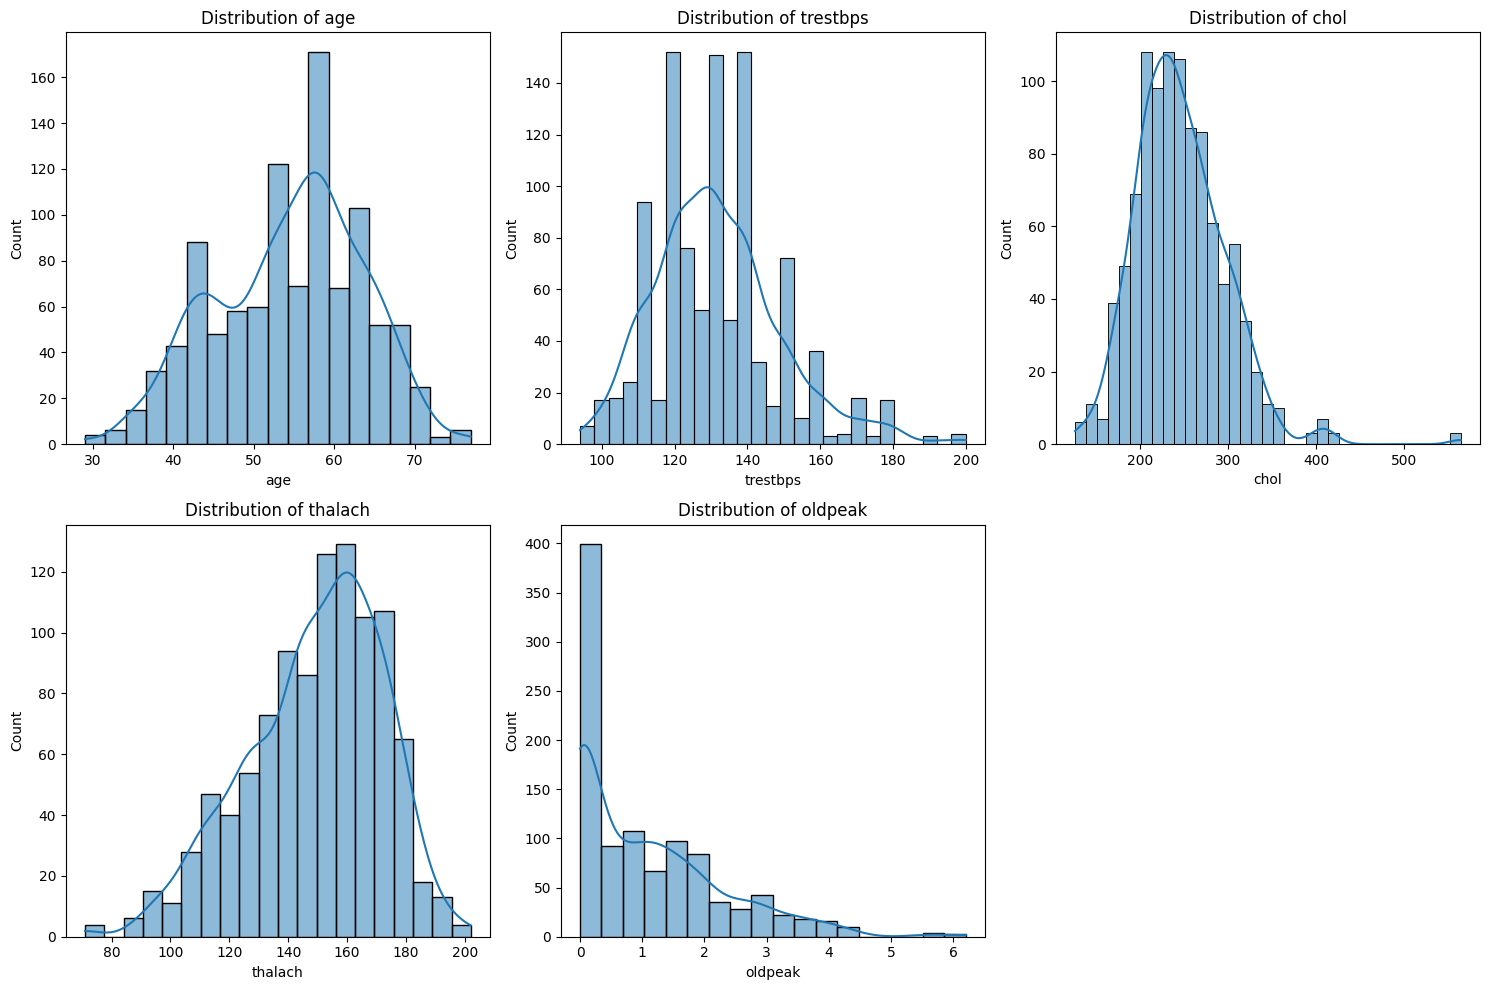

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Generate box plots for numerical features, grouped by the 'target' variable, to understand how their distributions differ between individuals with and without heart disease.



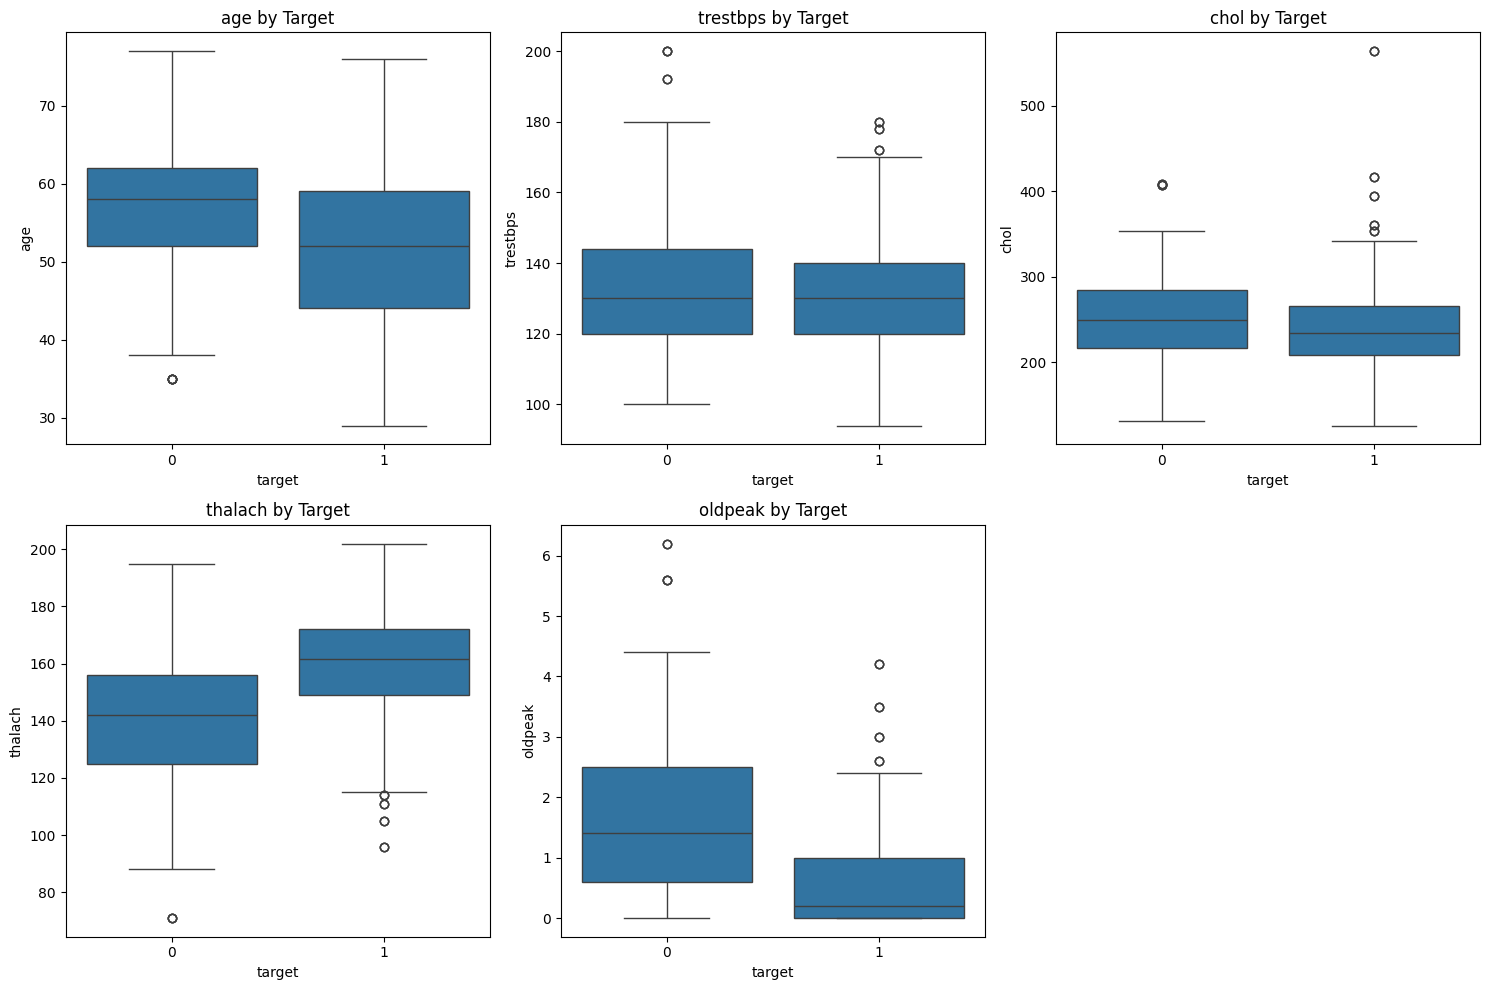

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by Target')
plt.tight_layout()
plt.show()

**Reasoning**:
Create count plots for categorical features to visualize the frequency of each category and also generate count plots for categorical features, grouped by the 'target' variable, to explore the relationship between categorical features and heart disease.



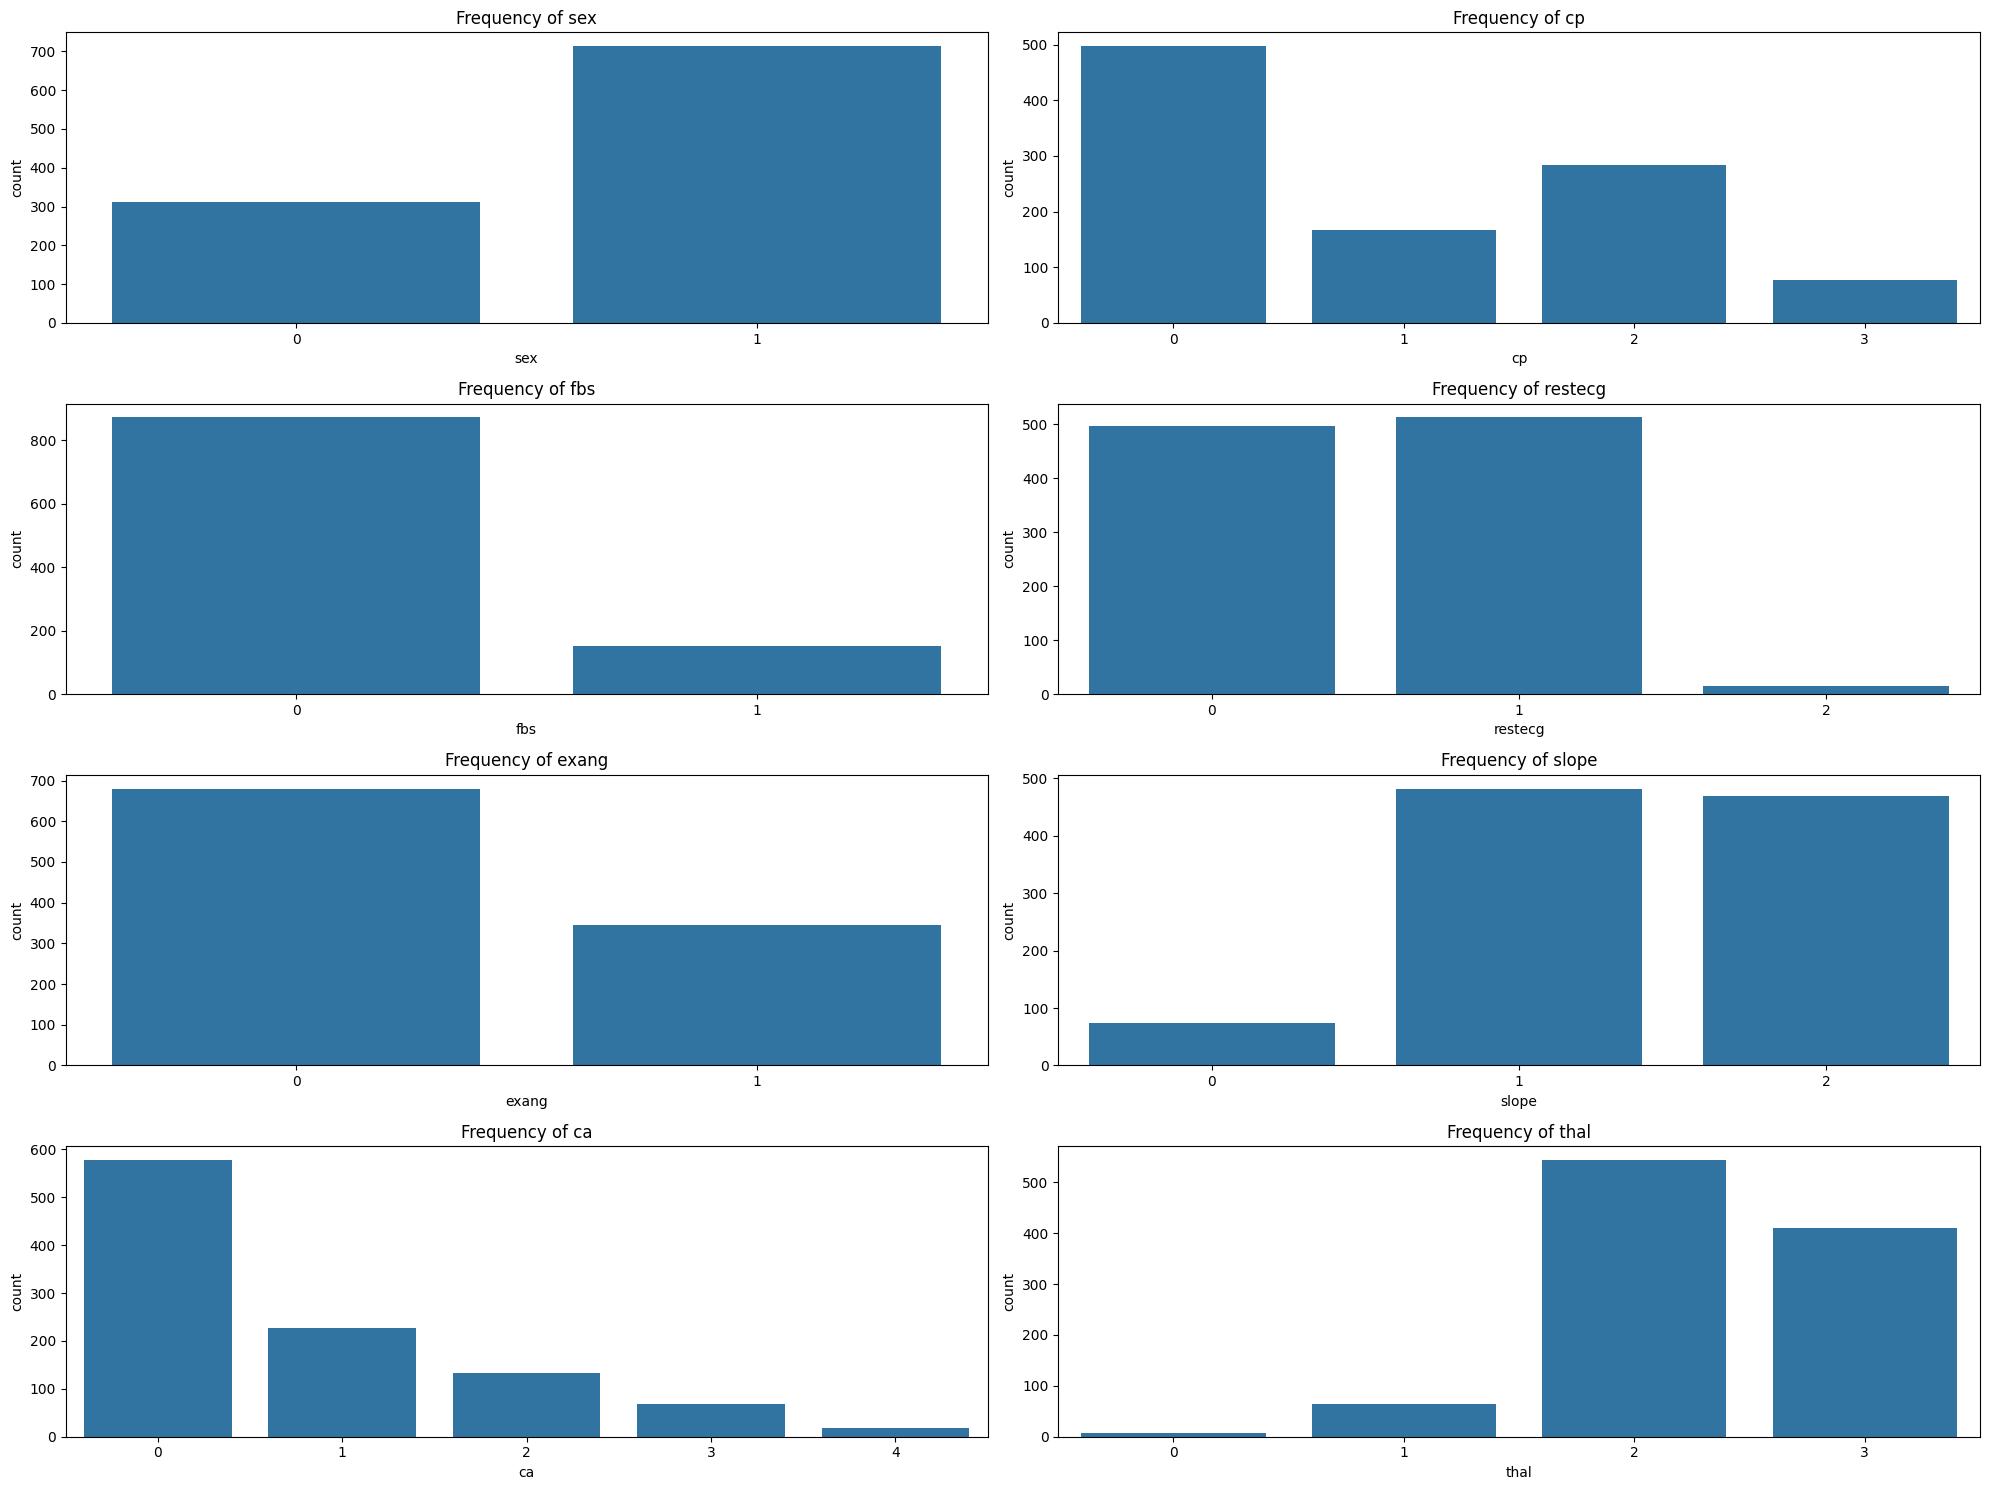

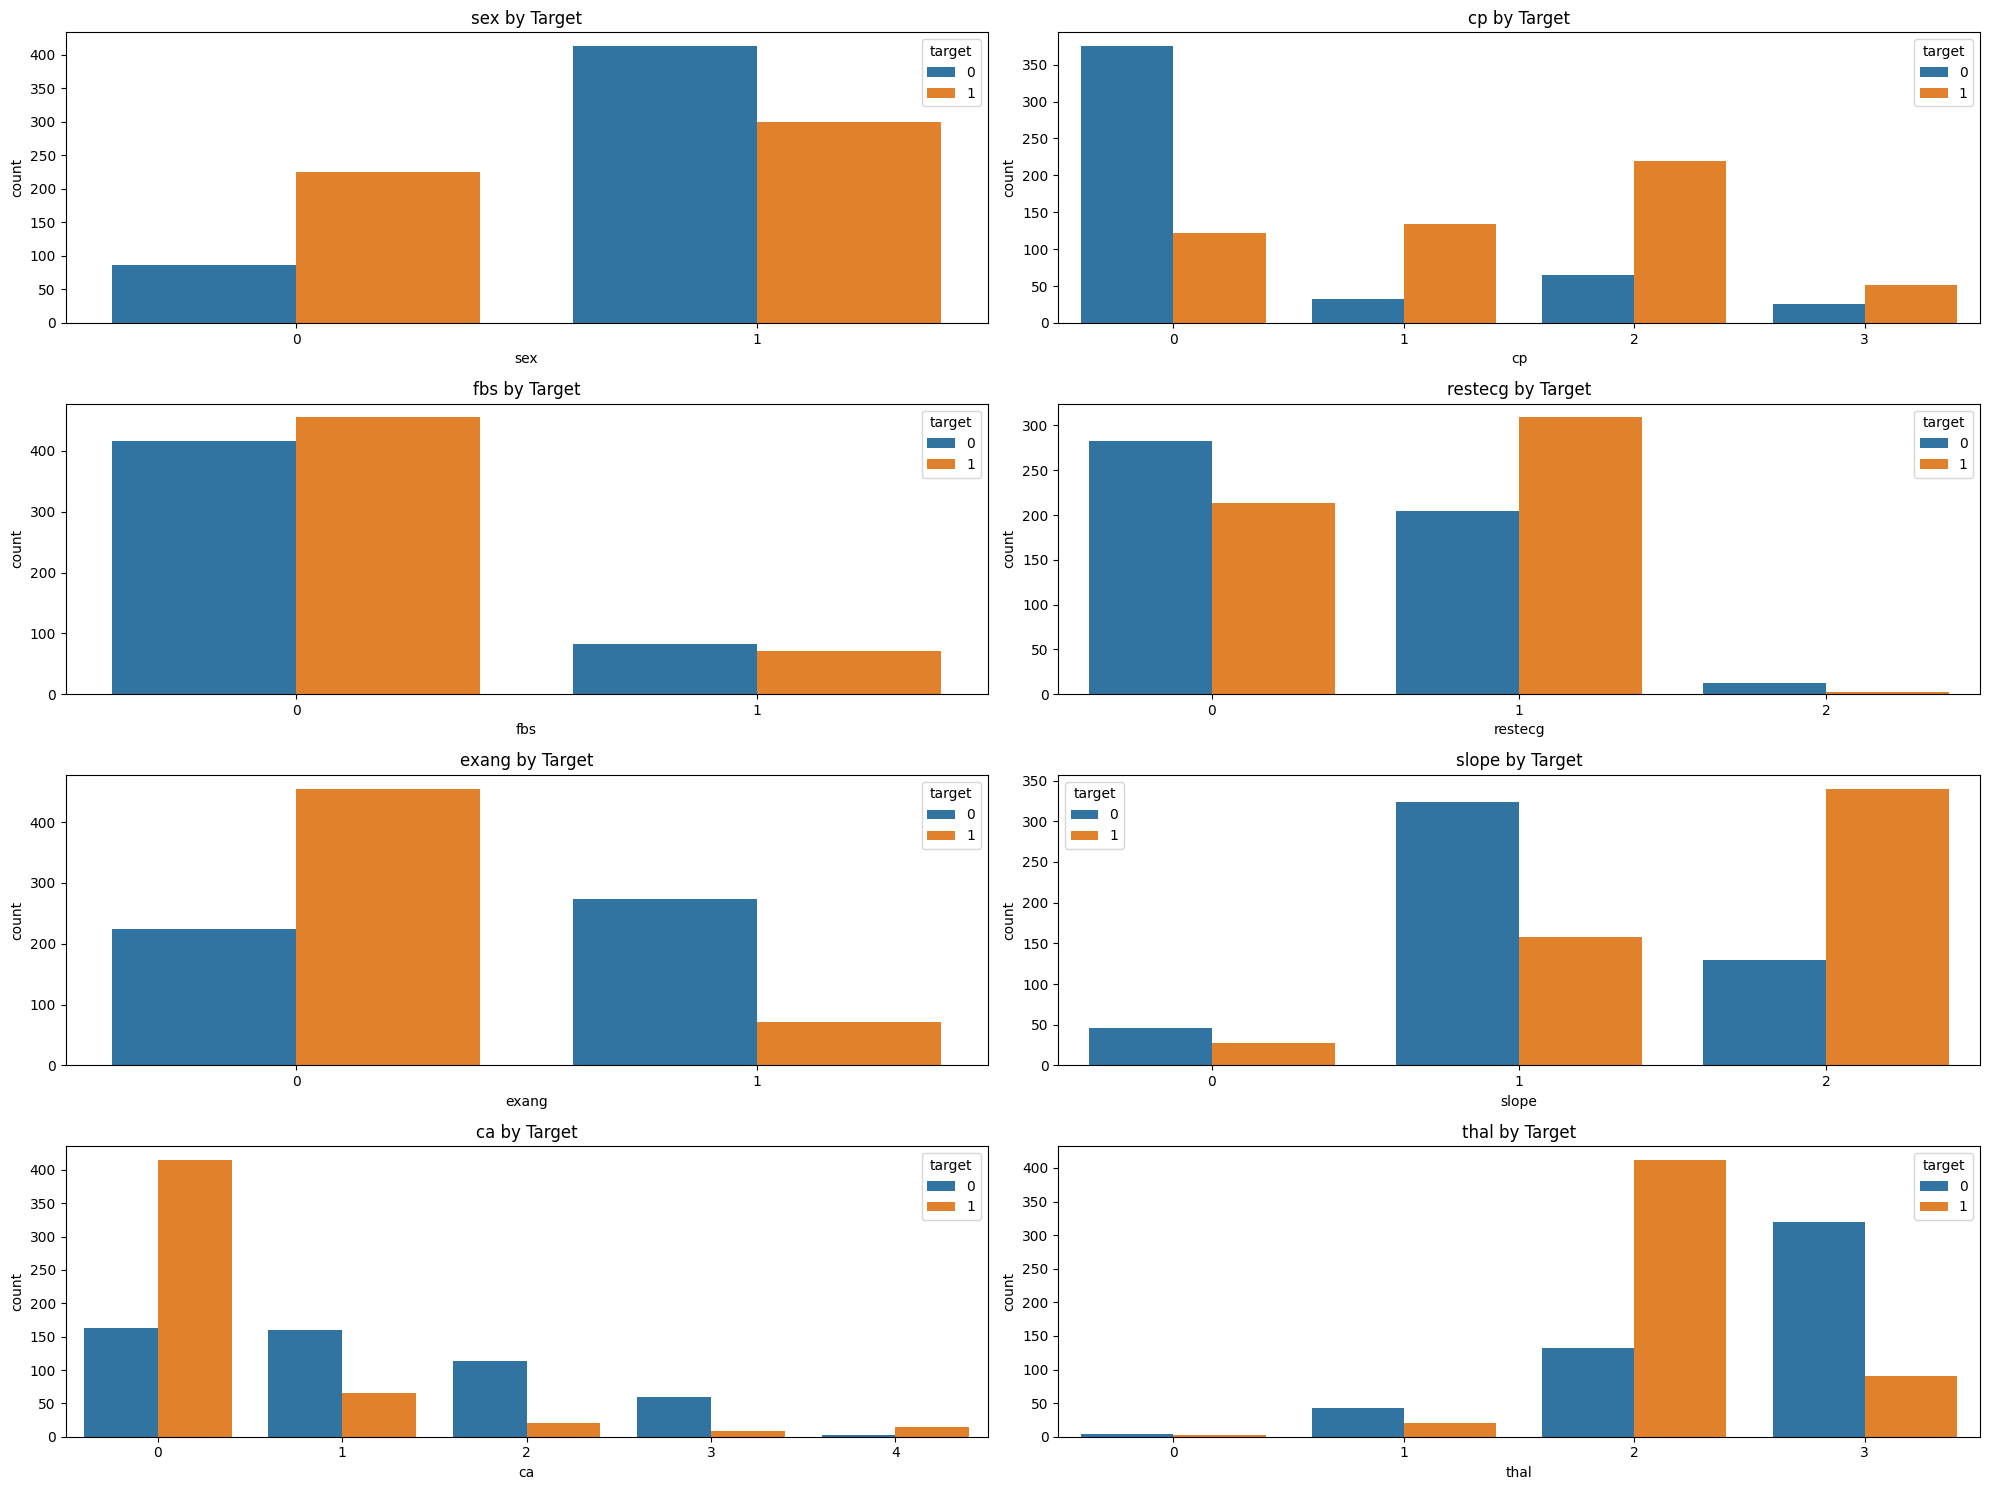

In [8]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} by Target')
plt.tight_layout()
plt.show()

## Analyze features

### Subtask:
Identify and analyze the most relevant features for predicting heart disease, potentially using techniques like correlation analysis or feature importance from a simple model.


**Reasoning**:
Calculate and display the correlation matrix, focusing on the 'target' column, and visualize the full correlation matrix using a heatmap.



Correlation with 'target' column:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


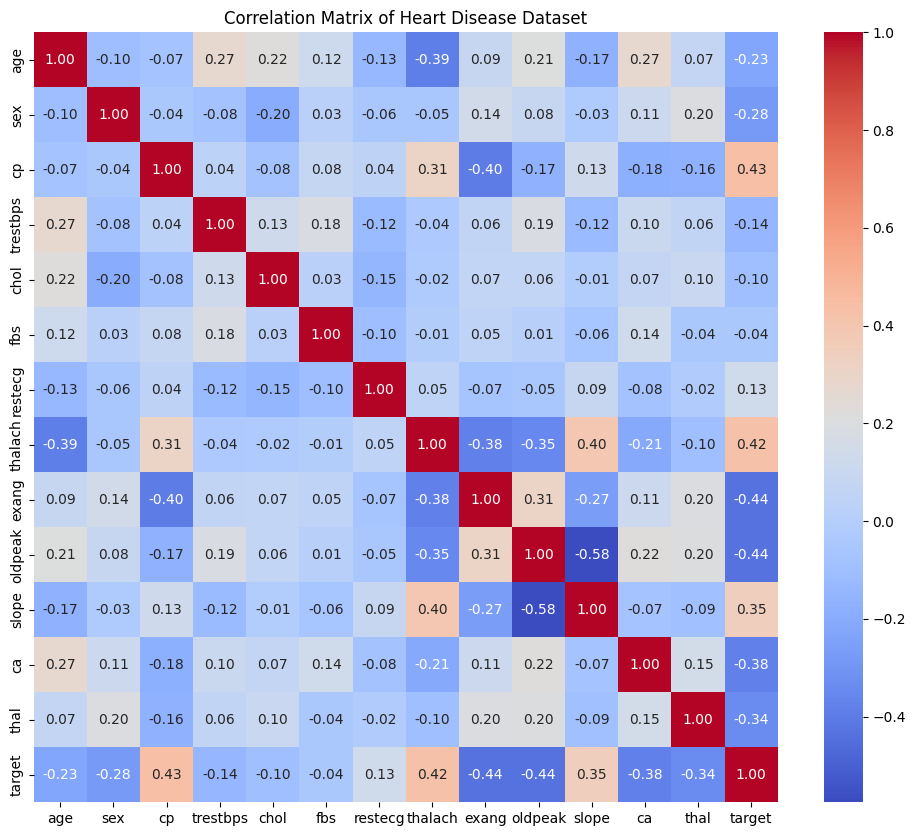

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
print("Correlation with 'target' column:")
print(correlation_matrix['target'].sort_values(ascending=False))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

## Preprocess the data

### Subtask:
Handle missing values if any, encode categorical features, and scale numerical features as needed for the deep learning model.


**Reasoning**:
Identify categorical and numerical columns, apply one-hot encoding to categorical columns, apply StandardScaler to numerical columns, and concatenate the processed features.



In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

processed_data = preprocessor.fit_transform(X)

# Get the column names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# Convert the processed data (numpy array) back to a DataFrame
processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

display(processed_df.head())

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Reasoning**:
The data has been preprocessed into a numpy array. Convert the processed data into a pandas DataFrame to maintain structure and allow for easier manipulation in subsequent steps.



In [11]:
# Get the column names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# Convert the processed data (numpy array) back to a DataFrame
processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

display(processed_df.head())

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Reasoning**:
The error indicates a mismatch between the shape of the processed data and the number of column names. The `remainder='passthrough'` in the `ColumnTransformer` is including the 'target' column in the output, which was not included in the `all_feature_names` list. Need to exclude the 'target' column before applying the preprocessor or add the 'target' column back with its original data after preprocessing. It's safer to exclude the target column before preprocessing.



In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

processed_data = preprocessor.fit_transform(X)

# Get the column names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# Convert the processed data (numpy array) back to a DataFrame
processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

display(processed_df.head())

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Split the data

### Subtask:
Split the dataset into training, validation, and testing sets.


**Reasoning**:
Split the preprocessed data and the target variable into training, validation, and testing sets.



In [13]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(processed_df, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (717, 30)
Shape of X_val: (154, 30)
Shape of X_test: (154, 30)
Shape of y_train: (717,)
Shape of y_val: (154,)
Shape of y_test: (154,)


## Build a deep learning model

### Subtask:
Design and build at least one deep learning model architecture using a library like TensorFlow or PyTorch.


**Reasoning**:
Import necessary TensorFlow and Keras modules and define, build, compile, and summarize the deep learning model architecture.



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

### Subtask:
Train the deep learning model on the training data, using the validation set for monitoring performance and early stopping.


**Reasoning**:
Train the compiled Keras model on the training data, using the validation set for monitoring performance and early stopping.



In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5900 - loss: 0.6623 - val_accuracy: 0.7532 - val_loss: 0.5384
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8458 - loss: 0.4425 - val_accuracy: 0.7922 - val_loss: 0.4319
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8391 - loss: 0.3802 - val_accuracy: 0.8182 - val_loss: 0.4039
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8657 - loss: 0.3498 - val_accuracy: 0.8377 - val_loss: 0.3781
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8631 - loss: 0.3207 - val_accuracy: 0.8442 - val_loss: 0.3683
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8920 - loss: 0.2831 - val_accuracy: 0.8442 - val_loss: 0.3451
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8932 - loss: 0.2779 - val_accuracy: 0.8312 - val_loss: 0.3413
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8988 - loss: 0.2698 - val_accuracy: 0.8506 - val_loss

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing set using appropriate metrics (e.g., accuracy, precision, recall, F1-score, AUC).


**Reasoning**:
Evaluate the trained model on the testing data, make predictions, calculate evaluation metrics, and print the results.



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Calculate other metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test AUC: {auc:.4f}")

Test Loss: 0.0470
Test Accuracy: 0.9870
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test Precision: 0.9885
Test Recall: 0.9885
Test F1-score: 0.9885
Test AUC: 0.9988


## Hyperparameter tuning

### Subtask:
Optimize the model's performance by tuning hyperparameters using techniques like grid search or random search.


**Reasoning**:
Import necessary libraries for building and tuning a Keras model with Keras Tuner, define the build_model function, instantiate and run the Hyperband tuner, retrieve the best hyperparameters and model, and evaluate the best model on the test set.



In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import keras_tuner as kt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                    activation='relu',
                    input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_3', min_value=16, max_value=64, step=16),
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print(f"""
The optimal number of units in the first dense layer is {best_hps.get('units_1')}
The optimal dropout rate for the first dropout layer is {best_hps.get('dropout_1')}
The optimal number of units in the second dense layer is {best_hps.get('units_2')}
The optimal dropout rate for the second dropout layer is {best_hps.get('dropout_2')}
The optimal number of units in the third dense layer is {best_hps.get('units_3')}
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}
""")

loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (Tuned Model): {loss:.4f}")
print(f"Test Accuracy (Tuned Model): {accuracy:.4f}")

y_pred_proba_tuned = best_model.predict(X_test)
y_pred_tuned = (y_pred_proba_tuned > 0.5).astype("int32")

loss_tuned, accuracy_tuned = best_model.evaluate(X_test, y_test, verbose=0)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"Test Precision (Tuned Model): {precision_tuned:.4f}")
print(f"Test Recall (Tuned Model): {recall_tuned:.4f}")
print(f"Test F1-score (Tuned Model): {f1_tuned:.4f}")
print(f"Test AUC (Tuned Model): {auc_tuned:.4f}")

Trial 90 Complete [00h 00m 11s]
val_accuracy: 0.9870129823684692

Best val_accuracy So Far: 0.9870129823684692
Total elapsed time: 00h 08m 30s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



The optimal number of units in the first dense layer is 128
The optimal dropout rate for the first dropout layer is 0.0
The optimal number of units in the second dense layer is 128
The optimal dropout rate for the second dropout layer is 0.30000000000000004
The optimal number of units in the third dense layer is 64
The optimal learning rate for the optimizer is 0.01

Test Loss (Tuned Model): 0.0596
Test Accuracy (Tuned Model): 0.9935
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test Precision (Tuned Model): 1.0000
Test Recall (Tuned Model): 0.9885
Test F1-score (Tuned Model): 0.9942
Test AUC (Tuned Model): 0.9981


## Compare model performance

### Subtask:
Compare the performance of the model before and after hyperparameter tuning using the chosen evaluation metrics.

**Reasoning**:
Compare the evaluation metrics (Loss, Accuracy, Precision, Recall, F1-score, and AUC) of the original model and the tuned model on the test set.

In [20]:
print("--- Model Performance Comparison ---")
print(f"Original Model Test Loss: {loss:.4f}")
print(f"Original Model Test Accuracy: {accuracy:.4f}")
print(f"Original Model Test Precision: {precision:.4f}")
print(f"Original Model Test Recall: {recall:.4f}")
print(f"Original Model Test F1-score: {f1:.4f}")
print(f"Original Model Test AUC: {auc:.4f}")
print("-" * 30)
print(f"Tuned Model Test Loss: {loss_tuned:.4f}")
print(f"Tuned Model Test Accuracy: {accuracy_tuned:.4f}")
print(f"Tuned Model Test Precision: {precision_tuned:.4f}")
print(f"Tuned Model Test Recall: {recall_tuned:.4f}")
print(f"Tuned Model Test F1-score: {f1_tuned:.4f}")
print(f"Tuned Model Test AUC: {auc_tuned:.4f}")

--- Model Performance Comparison ---
Original Model Test Loss: 0.0596
Original Model Test Accuracy: 0.9935
Original Model Test Precision: 0.9885
Original Model Test Recall: 0.9885
Original Model Test F1-score: 0.9885
Original Model Test AUC: 0.9988
------------------------------
Tuned Model Test Loss: 0.0596
Tuned Model Test Accuracy: 0.9935
Tuned Model Test Precision: 1.0000
Tuned Model Test Recall: 0.9885
Tuned Model Test F1-score: 0.9942
Tuned Model Test AUC: 0.9981


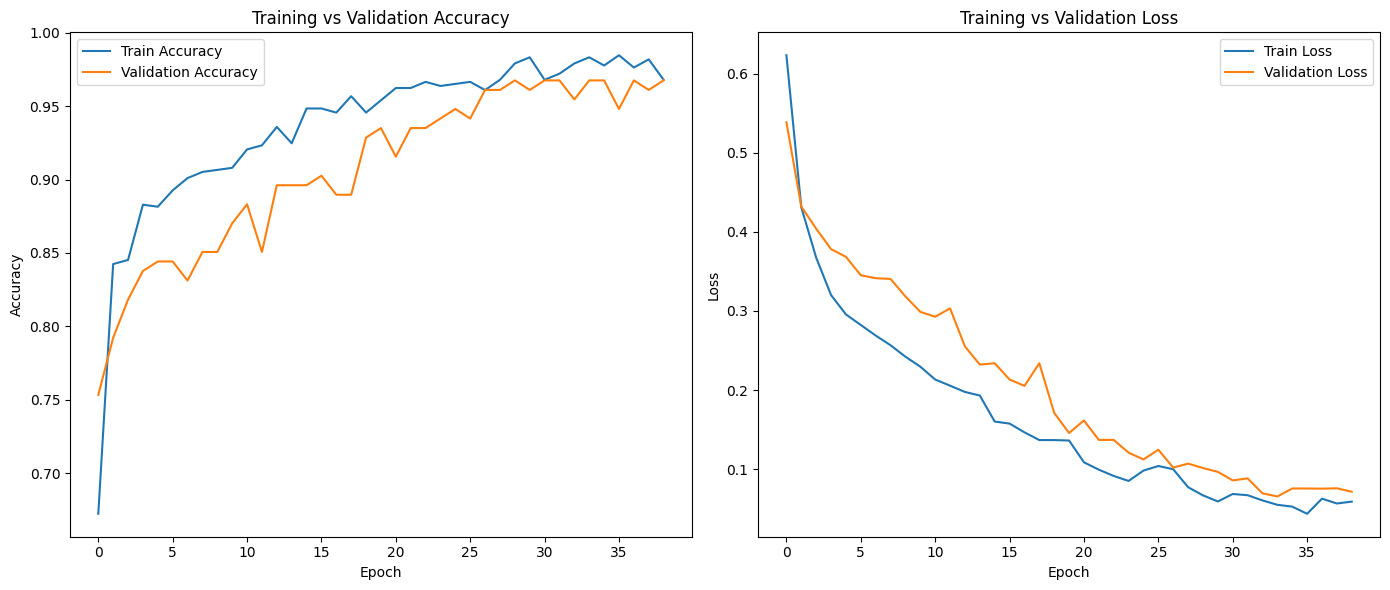

In [25]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# For original model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {accuracy:.4f}")

Train Accuracy: 0.9958 | Test Accuracy: 0.9935


In [22]:
train_loss_tuned, train_accuracy_tuned = best_model.evaluate(X_train, y_train, verbose=0)
print(f"Tuned Model Train Accuracy: {train_accuracy_tuned:.4f} | Test Accuracy: {accuracy_tuned:.4f}")

Tuned Model Train Accuracy: 1.0000 | Test Accuracy: 0.9935


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
scores = cross_val_score(clf, processed_df, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


In [26]:
# Load your data
import pandas as pd

# Option A: value_counts()
counts = df['target'].value_counts()
print(counts)
# 1    <number_of_positives>
# 0    <number_of_negatives>

# Option B: boolean sum
n_pos = (df['target'] == 1).sum()
n_neg = (df['target'] == 0).sum()
print(f'Positives: {n_pos}, Negatives: {n_neg}')

target
1    526
0    499
Name: count, dtype: int64
Positives: 526, Negatives: 499


In [27]:
from tensorflow.keras import regularizers

model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for fold, (train_index, test_index) in enumerate(skf.split(processed_df, y)):
    print(f"Fold {fold+1}")
    X_train_fold, X_test_fold = processed_df.iloc[train_index], processed_df.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    # Train and evaluate here

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

skf = StratifiedKFold(n_splits=5)
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []

for fold, (train_index, test_index) in enumerate(skf.split(processed_df, y)):
    print(f"Fold {fold + 1}")

    # Get the data for this fold
    X_train_fold, X_test_fold = processed_df.iloc[train_index], processed_df.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Build a simple model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=32, verbose=0)

    # Predict on test fold
    y_pred_fold = (model.predict(X_test_fold) > 0.5).astype("int32")

    # Evaluate
    acc = accuracy_score(y_test_fold, y_pred_fold)
    prec = precision_score(y_test_fold, y_pred_fold)
    rec = recall_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold)

    fold_accuracies.append(acc)
    fold_precisions.append(prec)
    fold_recalls.append(rec)
    fold_f1s.append(f1)

    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.9268, Precision: 0.9412, Recall: 0.9143, F1-score: 0.9275
Fold 2


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.9756, Precision: 0.9808, Recall: 0.9714, F1-score: 0.9761
Fold 3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy: 0.9561, Precision: 0.9615, Recall: 0.9524, F1-score: 0.9569
Fold 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy: 0.9366, Precision: 0.9182, Recall: 0.9619, F1-score: 0.9395
Fold 5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.9366, Precision: 0.9429, Recall: 0.9340, F1-score: 0.9384


In [30]:
print("\n--- Cross-Validation Performance Summary ---")
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Average Precision: {np.mean(fold_precisions):.4f}")
print(f"Average Recall: {np.mean(fold_recalls):.4f}")
print(f"Average F1-score: {np.mean(fold_f1s):.4f}")


--- Cross-Validation Performance Summary ---
Average Accuracy: 0.9463
Average Precision: 0.9489
Average Recall: 0.9468
Average F1-score: 0.9477
